In [1]:
from __future__ import print_function

import cobra
import cobra.test

# "ecoli" and "salmonella" are also valid arguments
model = cobra.test.create_test_model("textbook")

In [2]:
print(len(model.reactions))
print(len(model.metabolites))
print(len(model.genes))

95
72
137


In [3]:
model

Name,e_coli_core
Memory address,0x0220d5ae5b70
Number of metabolites,72
Number of reactions,95
Objective expression,-1.0*Biomass_Ecoli_core_reverse_2cdba + 1.0*Biomass_Ecoli_core
Compartments,"cytosol, extracellular"


In [4]:
model.reactions[29]

Reaction identifier,EX_glu__L_e
Name,L-Glutamate exchange
Memory address,0x0220e6eb5390
Stoichiometry,glu__L_e --> L-Glutamate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [6]:
model.metabolites.get_by_id("atp_c")

Metabolite identifier,atp_c
Name,ATP
Memory address,0x01357c1c3668
Formula,C10H12N5O13P3
Compartment,c
In 13 reaction(s),"PPS, ACKr, GLNS, ATPM, GLNabc, Biomass_Ecoli_core, PGK, PPCK, ATPS4r, PYK, PFK, ADK1, SUCOAS"


In [7]:
model.reactions.EX_glc__D_e.bounds

(-10.0, 1000.0)

In [8]:
pgi = model.reactions.get_by_id("PGI")
pgi

Reaction identifier,PGI
Name,glucose-6-phosphate isomerase
Memory address,0x01357c23e0b8
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,b4025
Lower bound,-1000.0
Upper bound,1000.0


In [9]:
print(pgi.name)
print(pgi.reaction)

glucose-6-phosphate isomerase
g6p_c <=> f6p_c


In [10]:
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)
print(pgi.reversibility)

-1000.0 < pgi < 1000.0
True


In [11]:
pgi.check_mass_balance()

{}

In [12]:
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
pgi.reaction

'g6p_c + h_c <=> f6p_c'

In [13]:
pgi.check_mass_balance()

{'charge': -1.0, 'H': -1.0}

In [14]:
pgi.subtract_metabolites({model.metabolites.get_by_id("h_c"): -1})
print(pgi.reaction)
print(pgi.check_mass_balance())

g6p_c <=> f6p_c
{}


In [15]:
pgi.reaction = "g6p_c --> f6p_c + h_c + green_eggs + ham"

unknown metabolite 'green_eggs' created
unknown metabolite 'ham' created


In [16]:
pgi.reaction

'g6p_c --> f6p_c + green_eggs + h_c + ham'

In [17]:
pgi.reaction = "g6p_c <=> f6p_c"
pgi.reaction

'g6p_c <=> f6p_c'

In [18]:
atp = model.metabolites.get_by_id("atp_c")
atp

Metabolite identifier,atp_c
Name,ATP
Memory address,0x01357c1c3668
Formula,C10H12N5O13P3
Compartment,c
In 13 reaction(s),"PPS, ACKr, GLNS, ATPM, GLNabc, Biomass_Ecoli_core, PGK, PPCK, ATPS4r, PYK, PFK, ADK1, SUCOAS"


In [19]:
print(atp.name)
print(atp.compartment)

ATP
c


In [20]:
atp.charge

-4

In [21]:
print(atp.formula)

C10H12N5O13P3


In [22]:
len(atp.reactions)

13

In [23]:
model.metabolites.get_by_id("g6p_c").reactions

frozenset({<Reaction Biomass_Ecoli_core at 0x1357c22df28>,
           <Reaction G6PDH2r at 0x1357c20e240>,
           <Reaction GLCpts at 0x1357c20e5c0>,
           <Reaction PGI at 0x1357c23e0b8>})

In [24]:
gpr = pgi.gene_reaction_rule
gpr

'b4025'

In [25]:
pgi.genes

frozenset({<Gene b4025 at 0x1357c21ea20>})

In [26]:
pgi_gene = model.genes.get_by_id("b4025")
pgi_gene

Gene identifier,b4025
Name,pgi
Memory address,0x01357c21ea20
Functional,True
In 1 reaction(s),PGI


In [27]:
pgi_gene.reactions

frozenset({<Reaction PGI at 0x1357c23e0b8>})

In [28]:
pgi.gene_reaction_rule = "(spam or eggs)"
pgi.genes

frozenset({<Gene eggs at 0x1357bf2ac50>, <Gene spam at 0x1357bf2ac88>})

In [29]:
pgi_gene.reactions

frozenset()

In [30]:
model.genes.get_by_id("spam")

Gene identifier,spam
Name,
Memory address,0x01357bf2ac88
Functional,True
In 1 reaction(s),PGI


In [31]:
cobra.manipulation.delete_model_genes(
    model, ["spam"], cumulative_deletions=True)
print("after 1 KO: %4d < flux_PGI < %4d" % (pgi.lower_bound, pgi.upper_bound))

cobra.manipulation.delete_model_genes(
    model, ["eggs"], cumulative_deletions=True)
print("after 2 KO:  %4d < flux_PGI < %4d" % (pgi.lower_bound, pgi.upper_bound))

after 1 KO: -1000 < flux_PGI < 1000
after 2 KO:     0 < flux_PGI <    0


In [32]:
cobra.manipulation.undelete_model_genes(model)
print(pgi.lower_bound, "< pgi <", pgi.upper_bound)

-1000 < pgi < 1000


In [33]:
model = cobra.test.create_test_model('textbook')
for reaction in model.reactions[:5]:
    with model as model:
        reaction.knock_out()
        model.optimize()
        print('%s blocked (bounds: %s), new growth rate %f' %
              (reaction.id, str(reaction.bounds), model.objective.value))

ACALD blocked (bounds: (0, 0)), new growth rate 0.873922
ACALDt blocked (bounds: (0, 0)), new growth rate 0.873922
ACKr blocked (bounds: (0, 0)), new growth rate 0.873922
ACONTa blocked (bounds: (0, 0)), new growth rate -0.000000
ACONTb blocked (bounds: (0, 0)), new growth rate -0.000000


In [35]:
[reaction.bounds for reaction in model.reactions[:5]]

[(-1000.0, 1000.0),
 (-1000.0, 1000.0),
 (-1000.0, 1000.0),
 (-1000.0, 1000.0),
 (-1000.0, 1000.0)]

In [36]:
print('original objective: ', model.objective.expression)
with model:
    model.objective = 'ATPM'
    print('print objective in first context:', model.objective.expression)
    with model:
        model.objective = 'ACALD'
        print('print objective in second context:', model.objective.expression)
    print('objective after exiting second context:',
          model.objective.expression)
print('back to original objective:', model.objective.expression)

original objective:  -1.0*Biomass_Ecoli_core_reverse_2cdba + 1.0*Biomass_Ecoli_core
print objective in first context: -1.0*ATPM_reverse_5b752 + 1.0*ATPM
print objective in second context: 1.0*ACALD - 1.0*ACALD_reverse_fda2b
objective after exiting second context: -1.0*ATPM_reverse_5b752 + 1.0*ATPM
back to original objective: -1.0*Biomass_Ecoli_core_reverse_2cdba + 1.0*Biomass_Ecoli_core


In [37]:
with model as inner:
    inner.reactions.PFK.knock_out

In [38]:
from __future__ import print_function

In [39]:
from cobra import Model, Reaction, Metabolite
# Best practise: SBML compliant IDs
model = Model('example_model')

reaction = Reaction('3OAS140')
reaction.name = '3 oxoacyl acyl carrier protein synthase n C140 '
reaction.subsystem = 'Cell Envelope Biosynthesis'
reaction.lower_bound = 0.  # This is the default
reaction.upper_bound = 1000.  # This is the default

In [41]:
ACP_c = Metabolite(
    'ACP_c',
    formula='C11H21N2O7PRS',
    name='acyl-carrier-protein',
    compartment='c')
omrsACP_c = Metabolite(
    '3omrsACP_c',
    formula='C25H45N2O9PRS',
    name='3-Oxotetradecanoyl-acyl-carrier-protein',
    compartment='c')
co2_c = Metabolite('co2_c', formula='CO2', name='CO2', compartment='c')
malACP_c = Metabolite(
    'malACP_c',
    formula='C14H22N2O10PRS',
    name='Malonyl-acyl-carrier-protein',
    compartment='c')
h_c = Metabolite('h_c', formula='H', name='H', compartment='c')
ddcaACP_c = Metabolite(
    'ddcaACP_c',
    formula='C23H43N2O8PRS',
    name='Dodecanoyl-ACP-n-C120ACP',
    compartment='c')

In [42]:
reaction.add_metabolites({
    malACP_c: -1.0,
    h_c: -1.0,
    ddcaACP_c: -1.0,
    co2_c: 1.0,
    ACP_c: 1.0,
    omrsACP_c: 1.0
})

reaction.reaction  # This gives a string representation of the reaction

'ddcaACP_c + h_c + malACP_c --> 3omrsACP_c + ACP_c + co2_c'

In [43]:
reaction.gene_reaction_rule = '( STM2378 or STM1197 )'
reaction.genes

frozenset({<Gene STM1197 at 0x1357bec6278>, <Gene STM2378 at 0x1357bec6a58>})

In [44]:
print('%i reactions initially' % len(model.reactions))
print('%i metabolites initially' % len(model.metabolites))
print('%i genes initially' % len(model.genes))

0 reactions initially
0 metabolites initially
0 genes initially


In [45]:
model.add_reactions([reaction])

# Now there are things in the model
print('%i reaction' % len(model.reactions))
print('%i metabolites' % len(model.metabolites))
print('%i genes' % len(model.genes))

1 reaction
6 metabolites
2 genes


In [46]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in model.reactions:
    print("%s : %s" % (x.id, x.reaction))

print("")
print("Metabolites")
print("-----------")
for x in model.metabolites:
    print('%9s : %s' % (x.id, x.formula))

print("")
print("Genes")
print("-----")
for x in model.genes:
    associated_ids = (i.id for i in x.reactions)
    print("%s is associated with reactions: %s" %
          (x.id, "{" + ", ".join(associated_ids) + "}"))

Reactions
---------
3OAS140 : ddcaACP_c + h_c + malACP_c --> 3omrsACP_c + ACP_c + co2_c

Metabolites
-----------
 malACP_c : C14H22N2O10PRS
      h_c : H
ddcaACP_c : C23H43N2O8PRS
    co2_c : CO2
    ACP_c : C11H21N2O7PRS
3omrsACP_c : C25H45N2O9PRS

Genes
-----
STM2378 is associated with reactions: {3OAS140}
STM1197 is associated with reactions: {3OAS140}


In [47]:
model.objective = '3OAS140'

In [48]:
print(model.objective.expression)
print(model.objective.direction)

-1.0*3OAS140_reverse_65ddc + 1.0*3OAS140
max


In [49]:
import cobra.test
import os
from os.path import join

data_dir = cobra.test.data_dir

print("mini test files: ")
print(", ".join(i for i in os.listdir(data_dir) if i.startswith("mini")))

textbook_model = cobra.test.create_test_model("textbook")
ecoli_model = cobra.test.create_test_model("ecoli")
salmonella_model = cobra.test.create_test_model("salmonella")

mini test files: 
mini.json, mini.mat, mini.pickle, mini.yml, mini_cobra.xml, mini_fbc1.xml, mini_fbc2.xml, mini_fbc2.xml.bz2, mini_fbc2.xml.gz


In [50]:
cobra.io.read_sbml_model(join(data_dir, "mini_fbc2.xml"))

Name,mini_textbook
Memory address,0x01357c78ecf8
Number of metabolites,23
Number of reactions,18
Objective expression,-1.0*ATPM_reverse_5b752 - 1.0*PFK_reverse_d24a6 + 1.0*PFK + 1.0*ATPM
Compartments,"cytosol, extracellular"


In [51]:
cobra.io.write_sbml_model(textbook_model, "test_fbc2.xml")

In [52]:
cobra.io.load_json_model(join(data_dir, "mini.json"))

Name,mini_textbook
Memory address,0x01357d5dd518
Number of metabolites,23
Number of reactions,18
Objective expression,-1.0*ATPM_reverse_5b752 - 1.0*PFK_reverse_d24a6 + 1.0*PFK + 1.0*ATPM
Compartments,"cytosol, extracellular"


In [53]:
cobra.io.save_json_model(textbook_model, "test.json")

In [96]:
plantarum = cobra.io.load_json_model(join("iNF517.json"))
plantarum

Name,iNF517
Memory address,0x01357f954cc0
Number of metabolites,650
Number of reactions,754
Objective expression,-1.0*BIOMASS_LLA_reverse_0796e + 1.0*BIOMASS_LLA
Compartments,"cytosol, extracellular space"


In [97]:
import cobra.test
model = cobra.test.create_test_model("textbook")

In [98]:
solution = model.optimize()
print(solution)

<Solution 0.874 at 0x13568b37160>


In [99]:
solution2 = plantarum.optimize()
print(solution2)

<Solution 0.043 at 0x1357f9f21d0>


In [100]:
solution.objective_value

0.8739215069684307

In [101]:
solution2.objective_value

0.042634605443373254

In [102]:
%%time
model.optimize().objective_value

Wall time: 0 ns


0.8739215069684307

In [103]:
%%time
model.slim_optimize()

Wall time: 0 ns


0.8739215069684307

In [104]:
model.summary()

IN FLUXES        OUT FLUXES    OBJECTIVES
---------------  ------------  ----------------------
o2_e      21.8   h2o_e  29.2   Biomass_Ecol...  0.874
glc__D_e  10     co2_e  22.8
nh4_e      4.77  h_e    17.5
pi_e       3.21


In [105]:
plantarum.summary()

IN FLUXES            OUT FLUXES          OBJECTIVES
-------------------  ------------------  -------------------
glc__D_e   1.26      h_e       2.95      BIOMASS_LLA  0.0426
h2o_e      0.364     for_e     1.78
glu__L_e   0.05      etoh_e    1.02
ser__L_e   0.04      ac_e      0.83
ala__L_e   0.0346    lac__L_e  0.4
pi_e       0.0294    co2_e     0.247
thr__L_e   0.0224    diact_e   0.053
arg__L_e   0.02      pro__L_e  0.03
leu__L_e   0.0158    ins_e     0.00539
lys__L_e   0.0109    nh4_e     0.00378
ile__L_e   0.0104    gcald_e   4.26e-07
ade_e      0.0101
val__L_e   0.01
cys__L_e   0.00811
phe__L_e   0.00716
gua_e      0.00506
orot_e     0.00439
met__L_e   0.00426
his__L_e   0.00322
ura_e      0.00207
thymd_e    0.00101
nac_e      8.53e-05
pnto__R_e  8.53e-06
4abz_e     4.26e-07
thm_e      4.26e-07


In [106]:
model.metabolites.nadh_c.summary()

PRODUCING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  --------------------------------------------------
42%    16     GAPD        g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
24%     9.28  PDH         coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
13%     5.06  AKGDH       akg_c + coa_c + nad_c --> co2_c + nadh_c + succ...
13%     5.06  MDH         mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
8%      3.1   Biomass...  1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0....

CONSUMING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  --------------------------------------------------
100%   38.5   NADH16      4.0 h_c + nadh_c + q8_c --> 3.0 h_e + nad_c + q...


In [107]:
plantarum.metabolites.nadh_c.summary()

PRODUCING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%      FLUX  RXN ID    REACTION
---  ------  --------  --------------------------------------------------
98%  2.31    GAPD      g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
2%   0.053   ACTD      actn__R_c + nad_c <=> diact_c + h_c + nadh_c

CONSUMING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%      FLUX  RXN ID    REACTION
---  ------  --------  --------------------------------------------------
43%  1.02    ALCD2x    etoh_c + nad_c <=> acald_c + h_c + nadh_c
38%  0.895   ACALD     acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
17%  0.4     LDH_L     lac__L_c + nad_c <=> h_c + nadh_c + pyr_c
1%   0.0137  G3PD1ir   dhap_c + h_c + nadh_c <=> glyc3p_c + nad_c


In [108]:
model.metabolites.atp_c.summary()

PRODUCING REACTIONS -- ATP (atp_c)
----------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
67%  45.5    ATPS4r      adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
23%  16      PGK         3pg_c + atp_c <=> 13dpg_c + adp_c
7%    5.06   SUCOAS      atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c
3%    1.76   PYK         adp_c + h_c + pep_c --> atp_c + pyr_c

CONSUMING REACTIONS -- ATP (atp_c)
----------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
76%  52.3    Biomass...  1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0....
12%   8.39   ATPM        atp_c + h2o_c --> adp_c + h_c + pi_c
11%   7.48   PFK         atp_c + f6p_c --> adp_c + fdp_c + h_c
0%    0.223  GLNS        atp_c + glu__L_c + nh4_c --> adp_c + gln__L_c +...


In [109]:
plantarum.metabolites.atp_c.summary()

PRODUCING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
51%  2.31    PGK         3pg_c + atp_c <=> 13dpg_c + adp_c
23%  1.02    PYK         adp_c + h_c + pep_c --> atp_c + pyr_c
18%  0.826   ACKr        ac_c + atp_c <=> actp_c + adp_c
3%   0.114   ADADir      atp_c + dcyt_c <=> adp_c + dcmp_c + h_c
3%   0.114   CYTK2       atp_c + dcmp_c <=> adp_c + dcdp_c
3%   0.114   NDPK7       atp_c + dcdp_c <=> adp_c + dctp_c
0%   0.0125  CBMKr_c...  atp_c + co2_c + nh4_c <=> adp_c + cbp_c + 2.0 h_c

CONSUMING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
37%  1.68    BIOMASS...  0.0064 CPS_LLA_c + 0.00074 DNA_LLA_c + 0.00015 ...
25%  1.11    PFK         atp_c + f6p_c --> adp_c + fdp_c + h_c
8%   0.

In [110]:
biomass_rxn = model.reactions.get_by_id("Biomass_Ecoli_core")

In [111]:
from cobra.util.solver import linear_reaction_coefficients
linear_reaction_coefficients(model)

{<Reaction Biomass_Ecoli_core at 0x1350062cac8>: 1.0}

In [112]:
linear_reaction_coefficients(plantarum)

{<Reaction BIOMASS_LLA at 0x1350024b278>: 1.0}

In [113]:
# change the objective to ATPM
model.objective = "ATPM"

# The upper bound should be 1000, so that we get
# the actual optimal value
model.reactions.get_by_id("ATPM").upper_bound = 1000.
linear_reaction_coefficients(model)

{<Reaction ATPM at 0x1350062c160>: 1.0}

In [114]:
model.optimize().objective_value

174.99999999999966

In [115]:
# change the objective to ATPM
plantarum.objective = "PFK"

# The upper bound should be 1000, so that we get
# the actual optimal value
plantarum.reactions.get_by_id("PFK").upper_bound = 1000.
linear_reaction_coefficients(plantarum)

{<Reaction PFK at 0x13500344470>: 1.0}

In [116]:
plantarum.optimize().objective_value

7.713333333333322

In [117]:
plantarum.metabolites.atp_c.summary()

PRODUCING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
54%    4.24  PGK         3pg_c + atp_c <=> 13dpg_c + adp_c
27%    2.12  PYK         adp_c + h_c + pep_c --> atp_c + pyr_c
19%    1.54  ACKr        ac_c + atp_c <=> actp_c + adp_c
0%     0.02  CBMKr_c...  atp_c + co2_c + nh4_c <=> adp_c + cbp_c + 2.0 h_c

CONSUMING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
97%    7.71  PFK         atp_c + f6p_c --> adp_c + fdp_c + h_c
2%     0.12  FTHFLi      atp_c + for_c + thf_c --> 10fthf_c + adp_c + pi_c
1%     0.05  GLU5K       atp_c + glu__L_c --> adp_c + glu5p_c
0%     0.02  ASPK        asp__L_c + atp_c <=> 4pasp_c + adp_c
0%     0.01  PC          atp_c + hco3_c + pyr_c --> adp_c + h_c + o

In [118]:
from cobra.flux_analysis import flux_variability_analysis

In [119]:
flux_variability_analysis(model, model.reactions[:10])

,maximum,minimum
ACALD,-2.208811e-30,-5.247085e-14
ACALDt,0.000000e+00,-5.247085e-14
ACKr,0.000000e+00,-8.024953e-14
ACONTa,2.000000e+01,2.000000e+01
ACONTb,2.000000e+01,2.000000e+01
ACt2r,0.000000e+00,-8.024953e-14
ADK1,3.410605e-13,0.000000e+00
AKGDH,2.000000e+01,2.000000e+01
AKGt2r,0.000000e+00,-2.902643e-14
ALCD2x,0.000000e+00,-4.547474e-14


In [120]:
cobra.flux_analysis.flux_variability_analysis(
    model, model.reactions[:10], fraction_of_optimum=0.9)

,maximum,minimum
ACALD,0.000000e+00,-2.692308
ACALDt,0.000000e+00,-2.692308
ACKr,6.635712e-30,-4.117647
ACONTa,2.000000e+01,8.461538
ACONTb,2.000000e+01,8.461538
ACt2r,0.000000e+00,-4.117647
ADK1,1.750000e+01,0.000000
AKGDH,2.000000e+01,2.500000
AKGt2r,2.651196e-16,-1.489362
ALCD2x,0.000000e+00,-2.333333


In [121]:
loop_reactions = [model.reactions.FRD7, model.reactions.SUCDi]
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=False)

,maximum,minimum
FRD7,980.0,0.0
SUCDi,1000.0,20.0


In [122]:
flux_variability_analysis(model, reaction_list=loop_reactions, loopless=True)

,maximum,minimum
FRD7,0.0,0.0
SUCDi,20.0,20.0


In [123]:
model.optimize()
model.summary(fva=0.95)

IN FLUXES                     OUT FLUXES                    OBJECTIVES
----------------------------  ----------------------------  ------------
id          Flux  Range       id          Flux  Range       ATPM  175
--------  ------  ----------  --------  ------  ----------
o2_e          60  [55.9, 60]  co2_e         60  [54.2, 60]
glc__D_e      10  [9.5, 10]   h2o_e         60  [54.2, 60]
nh4_e          0  [0, 0.673]  for_e          0  [0, 5.83]
pi_e           0  [0, 0.171]  h_e            0  [0, 5.83]
                              ac_e           0  [0, 2.06]
                              acald_e        0  [0, 1.35]
                              pyr_e          0  [0, 1.35]
                              etoh_e         0  [0, 1.17]
                              lac__D_e       0  [0, 1.13]
                              succ_e         0  [0, 0.875]
                              akg_e          0  [0, 0.745]
                              glu__L_e       0  [0, 0.673]


In [125]:
# Doesn't Run
# model.metabolites.pyr_c.summary(fva=0.95)

In [126]:
model.objective = 'Biomass_Ecoli_core'
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [127]:
abs(fba_solution.fluxes["Biomass_Ecoli_core"] - pfba_solution.fluxes[
    "Biomass_Ecoli_core"])

5.551115123125783e-16

In [128]:
import pandas
from time import time

import cobra.test
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

cobra_model = cobra.test.create_test_model("textbook")
ecoli_model = cobra.test.create_test_model("ecoli")

In [129]:
print('complete model: ', cobra_model.optimize())
with cobra_model:
    cobra_model.reactions.PFK.knock_out()
    print('pfk knocked out: ', cobra_model.optimize())

complete model:  <Solution 0.874 at 0x13501647550>
pfk knocked out:  <Solution 0.704 at 0x135016477b8>


In [130]:
print('complete model: ', cobra_model.optimize())
with cobra_model:
    cobra_model.genes.b1723.knock_out()
    print('pfkA knocked out: ', cobra_model.optimize())
    cobra_model.genes.b3916.knock_out()
    print('pfkB knocked out: ', cobra_model.optimize())

complete model:  <Solution 0.874 at 0x13501647128>
pfkA knocked out:  <Solution 0.874 at 0x135016472b0>
pfkB knocked out:  <Solution 0.704 at 0x135016472e8>


In [131]:
deletion_results = single_gene_deletion(cobra_model)

In [132]:
single_gene_deletion(cobra_model, cobra_model.genes[:20])

,growth,status
ids,,
(b0474),0.873922,optimal
(b1478),0.873922,optimal
(b1241),0.873922,optimal
(b3115),0.873922,optimal
(b1276),0.873922,optimal
(b1849),0.873922,optimal
(b0118),0.873922,optimal
(b0116),0.782351,optimal
(b3736),0.374230,optimal


In [133]:
single_gene_deletion(plantarum, plantarum.genes[:20])

,growth,status
ids,,
(LLMG_RS08940),7.713333,optimal
(LLMG_RS09820),7.713333,optimal
(LLMG_RS09160),7.713333,optimal
(LLMG_RS02245),7.713333,optimal
(LLMG_RS09905),7.713333,optimal
(LLMG_RS04745),7.713333,optimal
(LLMG_RS11480),7.713333,optimal
(LLMG_RS11485),7.713333,optimal
(LLMG_RS08925),7.713333,optimal


In [134]:
single_reaction_deletion(cobra_model, cobra_model.reactions[:20])

,growth,status
ids,,
(ACt2r),8.739215e-01,optimal
(ACONTa),4.931069e-18,optimal
(ETOHt2r),8.739215e-01,optimal
(AKGt2r),8.739215e-01,optimal
(ACALDt),8.739215e-01,optimal
(ATPM),9.166475e-01,optimal
(EX_ac_e),8.739215e-01,optimal
(CYTBD),2.116629e-01,optimal
(ACKr),8.739215e-01,optimal


In [136]:
double_gene_deletion(cobra_model, cobra_model.genes[-5:]).round(4)

,growth,status
ids,,
(b2465),0.8739,optimal
"(b2465, b0008)",0.8739,optimal
"(b2935, b2464)",0.8739,optimal
"(b2464, b2465)",0.8739,optimal
(b2935),0.8739,optimal
(b2464),0.8739,optimal
"(b2935, b2465)",0.8739,optimal
(b0008),0.8739,optimal
"(b2464, b3919)",0.7040,optimal


In [ ]:
start = time()  # start timer()
double_gene_deletion(
    ecoli_model, ecoli_model.genes[:300], processes=2)
t1 = time() - start
print("Double gene deletions for 200 genes completed in "
      "%.2f sec with 2 cores" % t1)

start = time()  # start timer()
double_gene_deletion(
    ecoli_model, ecoli_model.genes[:300], processes=1)
t2 = time() - start
print("Double gene deletions for 200 genes completed in "
      "%.2f sec with 1 core" % t2)

print("Speedup of %.2fx" % (t2 / t1))

Double gene deletions for 200 genes completed in 133.72 sec with 2 cores


In [ ]:
double_reaction_deletion(cobra_model, cobra_model.reactions[2:7]).round(4)

In [4]:
import cobra.test
from cobra.flux_analysis import production_envelope

model = cobra.test.create_test_model("textbook")

In [5]:
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])

In [6]:
prod_env.head()

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,1.442300e-13,0.0,0.000000,0.0,NaN,NaN,-10.0,-60.000000
1,EX_glc__D_e,1.310050e+00,0.0,0.072244,0.0,NaN,NaN,-10.0,-56.842105
2,EX_glc__D_e,2.620100e+00,0.0,0.144488,0.0,NaN,NaN,-10.0,-53.684211
3,EX_glc__D_e,3.930150e+00,0.0,0.216732,0.0,NaN,NaN,-10.0,-50.526316
4,EX_glc__D_e,5.240200e+00,0.0,0.288975,0.0,NaN,NaN,-10.0,-47.368421


In [7]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="EX_ac_e", carbon_sources="EX_glc__D_e")

In [8]:
prod_env.head()

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_o2_e
0,EX_glc__D_e,2.385536e-15,0.0,0.000000,0.0,2.345496e-15,0.0,-60.000000
1,EX_glc__D_e,5.263158e-02,0.0,1.578947,0.0,5.174819e-02,0.0,-56.842105
2,EX_glc__D_e,1.052632e-01,0.0,3.157895,0.0,1.034964e-01,0.0,-53.684211
3,EX_glc__D_e,1.578947e-01,0.0,4.736842,0.0,1.552446e-01,0.0,-50.526316
4,EX_glc__D_e,2.105263e-01,0.0,6.315789,0.0,2.069927e-01,0.0,-47.368421


In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

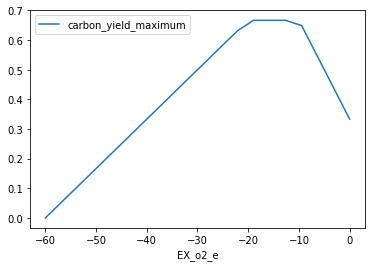

In [10]:
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');